<a href="https://www.kaggle.com/code/umangtri/diabetic-retinopathy-version-2?scriptVersionId=109561168" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eyepacspreprocess/trainLabels.csv
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/81_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/17169_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/38111_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/23964_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/13170_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/23309_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/18069_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/40447_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/29064_right.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/12589_left.jpeg
/kaggle/input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/39457_left.jpeg
/kag

## Importing libraries and modules

In [19]:
# Necessary utility modules and libraries
import os
import shutil
import pathlib
import random
import datetime
import cv2

# Plotting libraries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.signal import gaussian, convolve2d
import seaborn as sns

# Libraries for building the model
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Dropout, Activation, GlobalAveragePooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.applications import DenseNet121, ResNet50, InceptionV3, Xception, VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend
from tensorflow.keras.regularizers import l2, l1
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix

## Data Loading and Pre-processing

In [7]:
classes = ['No_DR', 'Mild', 'Moderate', 'Severe', 'Proliferate_DR']

In [8]:
dir_path = '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess'
os.listdir(dir_path)

['81_right.jpeg',
 '17169_left.jpeg',
 '38111_right.jpeg',
 '23964_left.jpeg',
 '13170_left.jpeg',
 '23309_left.jpeg',
 '18069_right.jpeg',
 '40447_right.jpeg',
 '29064_right.jpeg',
 '12589_left.jpeg',
 '39457_left.jpeg',
 '17441_left.jpeg',
 '36055_right.jpeg',
 '31624_right.jpeg',
 '43894_right.jpeg',
 '21649_right.jpeg',
 '21026_right.jpeg',
 '20412_right.jpeg',
 '3473_right.jpeg',
 '36596_right.jpeg',
 '32592_right.jpeg',
 '20529_left.jpeg',
 '38477_left.jpeg',
 '25458_right.jpeg',
 '33797_right.jpeg',
 '14883_left.jpeg',
 '14386_left.jpeg',
 '19447_left.jpeg',
 '21110_right.jpeg',
 '16515_right.jpeg',
 '9016_right.jpeg',
 '20196_right.jpeg',
 '24163_left.jpeg',
 '4930_right.jpeg',
 '34299_left.jpeg',
 '22679_right.jpeg',
 '24867_right.jpeg',
 '1452_right.jpeg',
 '12968_right.jpeg',
 '24593_left.jpeg',
 '39140_left.jpeg',
 '30407_right.jpeg',
 '3072_left.jpeg',
 '31891_left.jpeg',
 '32130_right.jpeg',
 '31763_left.jpeg',
 '8769_right.jpeg',
 '19878_right.jpeg',
 '15879_left.jpeg',


In [9]:
df_temp = pd.read_csv("../input/eyepacspreprocess/trainLabels.csv")

In [10]:
len(df_temp), df_temp

(35108,
              image  level
 0          10_left      0
 1         10_right      0
 2          13_left      0
 3         13_right      0
 4          15_left      1
 ...            ...    ...
 35103  44347_right      0
 35104   44348_left      0
 35105  44348_right      0
 35106   44349_left      0
 35107  44349_right      1
 
 [35108 rows x 2 columns])

In [11]:
df_temp['level'].value_counts()

0    25802
2     5288
1     2438
3      872
4      708
Name: level, dtype: int64

In [12]:
class_code = {0: "No_DR",
              1: "Mild", 
              2: "Moderate",
              3: "Severe",
              4: "Proliferate_DR"}
df_temp.rename(columns={"image": "id_code", "level": "diagnosis"}, inplace=True)

In [13]:
def mapping_temp(df, root=dir_path):
    class_code = {0: "No_DR",
                  1: "Mild", 
                  2: "Moderate",
                  3: "Severe",
                  4: "Proliferate_DR"}
    df['label'] = list(map(class_code.get, df['diagnosis']))
    df['path'] = [i[1]['label']+'/'+i[1]['id_code']+'.jpeg' for i in df.iterrows()]
    return df

df_temp = mapping_temp(df_temp)
df_temp

id_code  diagnosis  label                    path
0          10_left          0  No_DR      No_DR/10_left.jpeg
1         10_right          0  No_DR     No_DR/10_right.jpeg
2          13_left          0  No_DR      No_DR/13_left.jpeg
3         13_right          0  No_DR     No_DR/13_right.jpeg
4          15_left          1   Mild       Mild/15_left.jpeg
...            ...        ...    ...                     ...
35103  44347_right          0  No_DR  No_DR/44347_right.jpeg
35104   44348_left          0  No_DR   No_DR/44348_left.jpeg
35105  44348_right          0  No_DR  No_DR/44348_right.jpeg
35106   44349_left          0  No_DR   No_DR/44349_left.jpeg
35107  44349_right          1   Mild   Mild/44349_right.jpeg

[35108 rows x 4 columns]

In [14]:
# Dropping the diagnosis column because the model assigns different codes for prediction
df_temp.drop(['diagnosis'], axis=1, inplace=True)

In [15]:
df_temp

id_code  label                    path
0          10_left  No_DR      No_DR/10_left.jpeg
1         10_right  No_DR     No_DR/10_right.jpeg
2          13_left  No_DR      No_DR/13_left.jpeg
3         13_right  No_DR     No_DR/13_right.jpeg
4          15_left   Mild       Mild/15_left.jpeg
...            ...    ...                     ...
35103  44347_right  No_DR  No_DR/44347_right.jpeg
35104   44348_left  No_DR   No_DR/44348_left.jpeg
35105  44348_right  No_DR  No_DR/44348_right.jpeg
35106   44349_left  No_DR   No_DR/44349_left.jpeg
35107  44349_right   Mild   Mild/44349_right.jpeg

[35108 rows x 3 columns]

In [16]:
# wiener filter
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = np.fft.fft2(dummy)
    kernel = np.fft.fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(np.fft.ifft2(dummy))
    return dummy

def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def isbright(image, dim=227, thresh=0.4):
    # Resize image to 10x10
    image = cv2.resize(image, (dim, dim))
    # Convert color space to LAB format and extract L channel
    L, A, B = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2LAB))
    # Normalize L channel by dividing all pixel values with maximum pixel value
    L = L/np.max(L)
    # Return True if mean is greater than thresh else False
    return np.mean(L) > thresh

In [17]:
def image_preprocessing(img):
    # 1. Read the image
#     img = mpimg.imread(img_path)
    img = img.astype(np.uint8)
    
    # 2. Extract the green channel of the image
    b, g, r = cv2.split(img)

    # Applying wiener filter to reduce noise
    wiener = wiener_filter(g, gaussian_kernel(3), 10)
    g = cv2.addWeighted(g, 1.5, wiener.astype("uint8"), -0.5, 0)

    # # 3.1 Intensify the image using CLAHE.
    clh = cv2.createCLAHE(clipLimit=3.0)
    g = clh.apply(g.astype('uint8'))
    
    merged_bgr_green_fused = cv2.merge((b, g, r))
    # 6. Stacking the image into 3 channels
#     stacked_img = np.stack((merged_bgr_green_fused,)*3, axis=-1)
    
    # Checking for intensity of image
    if isbright(merged_bgr_green_fused)==False:
        output_gaussian = cv2.GaussianBlur(img, (5, 5), 0)
        merged_bgr_green_fused = cv2.addWeighted(merged_bgr_green_fused, 1.5, output_gaussian, -0.5, 0)

    return merged_bgr_green_fused.astype("float64")

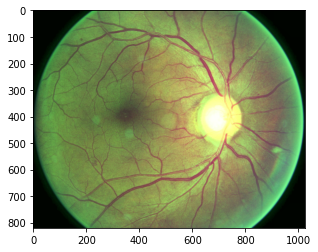

In [20]:
p = "../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/35667_left.jpeg"
img = mpimg.imread(p)
pro = image_preprocessing(img)
filename = os.path.basename(p)
plt.imshow(pro.astype("uint8"), cmap="gray");
# cv2.imwrite(filename, pro)
# plt.imshow(img)

In [16]:
random_img_path = [dir_path+'/'+img for img in random.sample(os.listdir(dir_path), 50)]
random_img_path

['../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/37996_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/11915_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/9879_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/3897_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/19369_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/15336_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/9257_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/1294_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/11492_right.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/10440_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preprocess/13697_left.jpeg',
 '../input/eyepacspreprocess/eyepacs_preprocess/eyepacs_preproce

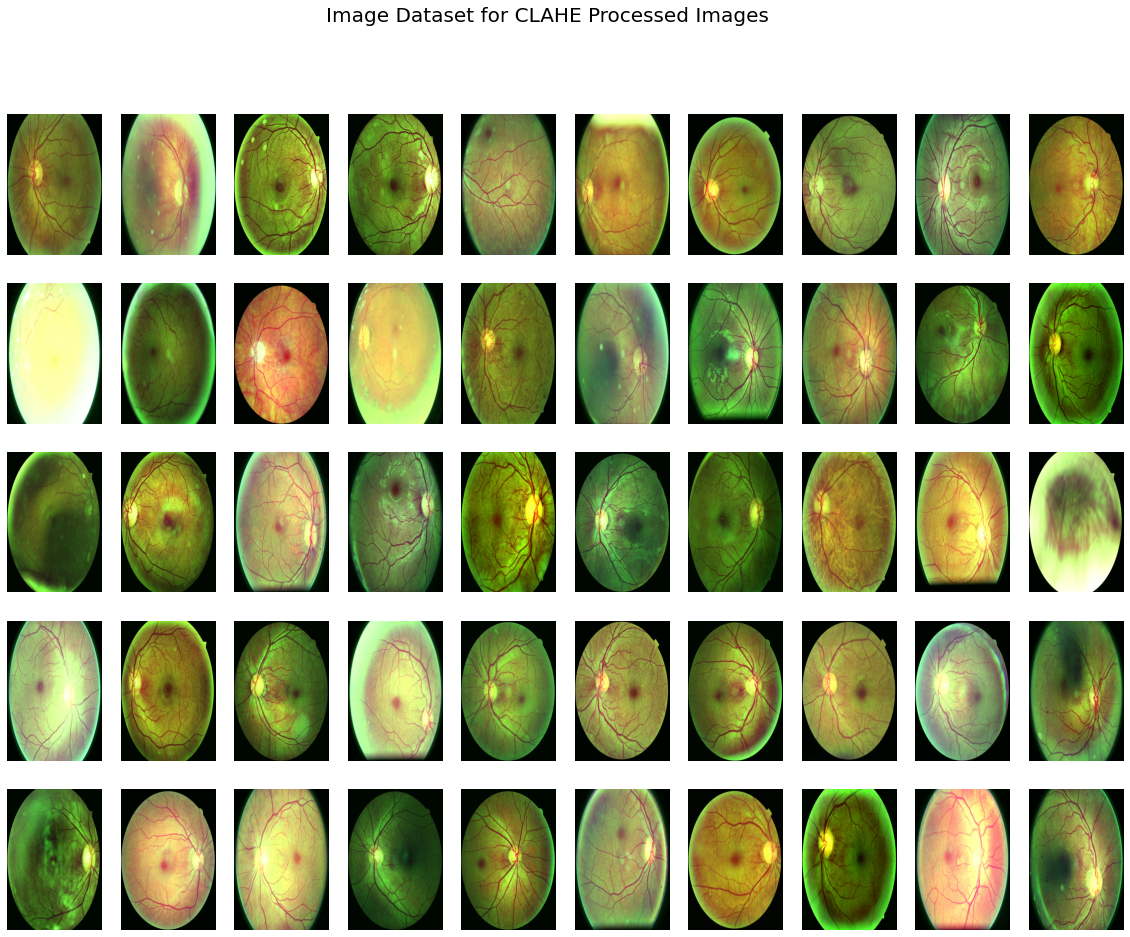

In [21]:
plt.figure(figsize=(20, 15))
plt.suptitle("Image Dataset for CLAHE Processed Images", fontsize=20)

for i in range(1, 51):
    plt.subplot(5, 10, i)
    img = mpimg.imread(random_img_path[i-1])
    img_pro = image_preprocessing(img)
    plt.imshow(img_pro.astype("uint8"), cmap="gray", aspect="auto")
    plt.axis(False);

In [17]:
for i in range(5):
    os.mkdir('./'+class_code[i])

In [18]:
import os
import shutil
# for i in df_temp.iloc[:5, :].iterrows():
#     print(i[1][2])
res = [[i[1][1], i[1][2]] for i in df_temp.iterrows()]
for i in res:
    des = './'+i[0]+'/'
    src = dir_path+'/'+i[1].split('/')[1]
    shutil.copy(src, des)

In [19]:
# The model assigns labels in ascending order
classes = sorted(classes)
classes

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']

In [20]:
train_df_temp = {}
test_df_temp = {}
for i in range(5):
    df = df_temp[df_temp['label']==classes[i]]['id_code'].to_list()
    random.seed(42)
    x = random.sample(df, int(0.8*len(df)))
    for j in x:
        train_df_temp[j] = i
    for j in df:
        if j not in train_df_temp.keys():
            test_df_temp[j] = i
train_df_temp = pd.DataFrame(train_df_temp.items(), columns=['id_code', 'diagnosis']).sample(frac=1, random_state=42)
test_df_temp = pd.DataFrame(test_df_temp.items(), columns=['id_code', 'diagnosis']).sample(frac=1, random_state=42)
train_df_temp

id_code  diagnosis
17599   29303_left          2
5676    29857_left          1
10356   33818_left          2
9463   25402_right          2
428    12990_right          0
...            ...        ...
21575   30586_left          2
5390    11270_left          1
860    27360_right          0
15795  44188_right          2
23654   40793_left          2

[28084 rows x 2 columns]

In [21]:
class_code = {0: "Mild",
              1: "Moderate", 
              2: "No_DR",
              3: "Proliferate_DR",
              4: "Severe"}
train_df_temp['label'] = list(map(class_code.get, train_df_temp['diagnosis']))
train_df_temp['path'] = [i[1]['label']+'/'+i[1]['id_code']+'.jpeg' for i in train_df_temp.iterrows()]
test_df_temp['label'] = list(map(class_code.get, test_df_temp['diagnosis']))
test_df_temp['path'] = [i[1]['label']+'/'+i[1]['id_code']+'.jpeg' for i in test_df_temp.iterrows()]

In [22]:
# Initializing the input size
IMG_SHAPE = (224, 224)
N_SPLIT = 3
EPOCHS = 10

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   preprocessing_function = image_preprocessing)
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                        preprocessing_function = image_preprocessing)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df_temp, 
                                               directory='./',
                                               x_col='path',
                                               y_col='label',
                                               class_mode="categorical",
                                               batch_size=32,
                                               seed=42,
                                               target_size=IMG_SHAPE)

valid_data = validation_datagen.flow_from_dataframe(dataframe=test_df_temp, 
                                                   directory='./',
                                                   x_col='path',
                                                   y_col='label',
                                                   class_mode="categorical",
                                                   batch_size=32, 
                                                   seed=42, 
                                                   target_size=IMG_SHAPE)

# Initializing the early stopping callback
es = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

Found 28084 validated image filenames belonging to 5 classes.
Found 7024 validated image filenames belonging to 5 classes.


### Evaluation metric helper functions

In [24]:
def cm(y_true, y_pred):
    classes.sort()
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = classes, 
                     columns = classes)
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

def metrics(y_true, y_pred):
#     print(classification_report(y_true, y_pred, target_names=classes))
    acc = accuracy_score(y_true, y_pred)
    res = []
    for l in [0,1,2,3,4]:
        prec,recall,_,_ = precision_recall_fscore_support(np.array(y_true)==l,
                                                          np.array(y_pred)==l,
                                                          pos_label=True,
                                                          average=None)
        res.append([classes[l],recall[0],recall[1]])
    df_res = pd.DataFrame(res,columns = ['class','sensitivity','specificity'])
    return df_res, acc

In [25]:
# Function to train model
def train_model(model_test, epochs=EPOCHS, lr=0.001): 
    # Compile the model
    model_test.compile(loss='categorical_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                      metrics=['accuracy'])

    history = model_test.fit(train_data,
                           validation_data=valid_data,
                           steps_per_epoch=int(0.2* int(train_data.n//train_data.batch_size)),
                           epochs=epochs,
                           validation_steps=int(valid_data.n//valid_data.batch_size),
                           callbacks=[es])
    return history.history

# Function to make predictions on the test data
def make_predictions(model_test):
    # Evaluate the model
    predictions = model_test.predict(valid_data, verbose=1)
    y_preds = np.argmax(predictions, axis=1)
    return y_preds

In [26]:
# Function to plot the performance metrics
def plot_result(hist):
    plt.figure(figsize=(20, 10));
    plt.suptitle(f"Performance Metrics", fontsize=20)
    
    # Actual and validation losses
    plt.subplot(1, 2, 1);
    plt.plot(hist['loss'], label='train')
    plt.plot(hist['val_loss'], label='validation')
    plt.title('Train and val loss curve')
    plt.legend()

    # Actual and validation accuracy
    plt.subplot(1, 2, 2);
    plt.plot(hist['accuracy'], label='train')
    plt.plot(hist['val_accuracy'], label='validation')
    plt.title('Train and val accuracy curve')
    plt.legend()

In [27]:
# View random images in the dataset
def view_random_images(root_dir, classes=classes):
    class_paths = [root_dir + "/" + image_class for image_class in classes]
    # print(class_paths)
    images_path = []
    labels = []
    for i in range(len(class_paths)):
        random_images = random.sample(os.listdir(class_paths[i]), 10)
        random_images_path = [class_paths[i]+'/'+img for img in random_images]
        for j in random_images_path:
            images_path.append(j)
            labels.append(classes[i])
    images_path

    plt.figure(figsize=(17, 10))
    plt.suptitle("Image Dataset", fontsize=20)

    for i in range(1, 51):
        plt.subplot(5, 10, i)
        img = mpimg.imread(images_path[i-1])
        plt.imshow(img, aspect="auto")
        plt.title(labels[i-1])
        plt.axis(False);

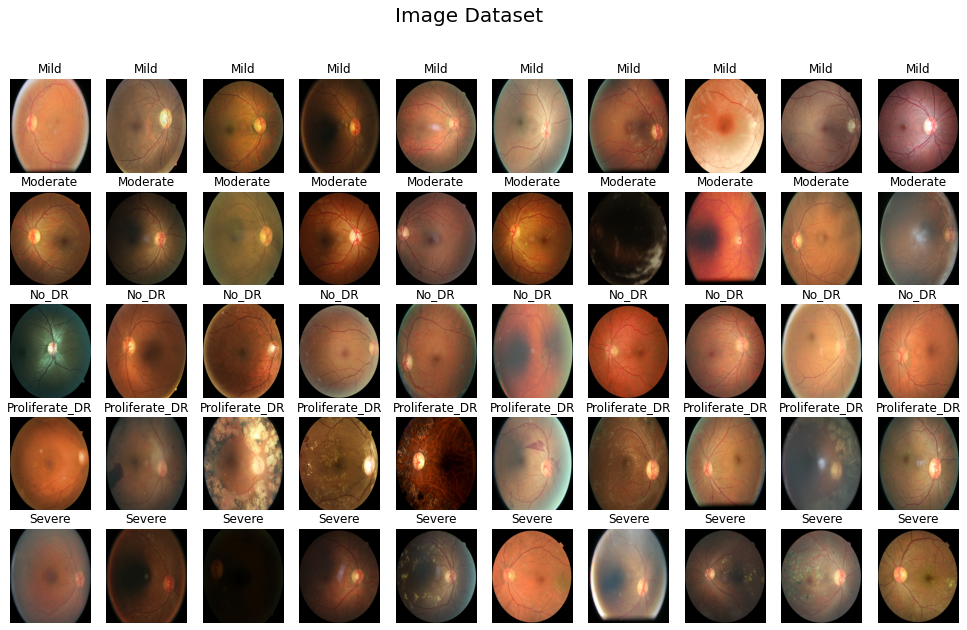

In [39]:
# Observing the images
view_random_images(root_dir='./')

## Modelling (base Models)
We'll use the following ImageNet models for training the images and observe the variations of the accuracy of the predicitions as predicted by the models:
* AlexNet
* DenseNet121
* ResNet50
* InceptionV3
* VGG-16

## 1. AlexNet

In [40]:
# Basic CNN model for AlexNet
model_alexnet = tf.keras.Sequential([
    Conv2D(input_shape=IMG_SHAPE+(3,), filters=96,kernel_size=11,strides=4,activation='relu'),
    MaxPool2D(pool_size=3,strides=2),
    Conv2D(filters=256,kernel_size=5,strides=1,padding='valid',activation='relu'),
    MaxPool2D(pool_size=3,strides=2),
    Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'),
    Conv2D(filters=384,kernel_size=3,strides=1,padding='same',activation='relu'),
    Conv2D(filters=256,kernel_size=3,strides=1,padding='same',activation='relu'),
    MaxPool2D(pool_size=3,strides=2),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dropout(0.5),
    Flatten(),
    Dense(len(classes), activation='softmax')
], name="model_AlexNet")

In [41]:
# Summary of AlexNet model
model_alexnet.summary()

Model: "model_AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 256)     

In [42]:
model_alexnet_history = train_model(model_alexnet)

Epoch 1/10
175/175 [==============================] - 316s 2s/step - loss: 0.9327 - accuracy: 0.7235 - val_loss: 0.8684 - val_accuracy: 0.7354
Epoch 2/10
175/175 [==============================] - 314s 2s/step - loss: 0.8810 - accuracy: 0.7366 - val_loss: 0.8829 - val_accuracy: 0.7347
Epoch 3/10
175/175 [==============================] - 310s 2s/step - loss: 0.8794 - accuracy: 0.7346 - val_loss: 0.8707 - val_accuracy: 0.7346
Epoch 4/10
175/175 [==============================] - 308s 2s/step - loss: 0.8616 - accuracy: 0.7395 - val_loss: 0.8736 - val_accuracy: 0.7349
Epoch 5/10
175/175 [==============================] - 311s 2s/step - loss: 0.8826 - accuracy: 0.7339 - val_loss: 0.8689 - val_accuracy: 0.7346
Epoch 6/10
175/175 [==============================] - 309s 2s/step - loss: 0.8738 - accuracy: 0.7373 - val_loss: 0.8776 - val_accuracy: 0.7346
Epoch 7/10
175/175 [==============================] - 308s 2s/step - loss: 0.8657 - accuracy: 0.7373 - val_loss: 0.8800 - val_accuracy: 0.7353

In [43]:
model_alexnet.save('model_alexnet_wiener_clahe_g.h5')

2022-10-30 10:51:16.039895: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 67108864 exceeds 10% of free system memory.
2022-10-30 10:51:16.262135: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 67108864 exceeds 10% of free system memory.
2022-10-30 10:51:16.397115: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 67108864 exceeds 10% of free system memory.


In [44]:
model_alexnet_results = model_alexnet.evaluate(valid_data, batch_size=32)

220/220 [==============================] - 139s 631ms/step - loss: 0.8705 - accuracy: 0.7348


In [45]:
y_preds_alexnet = make_predictions(model_alexnet)

220/220 [==============================] - 139s 633ms/step


In [46]:
y_true = valid_data.classes

In [47]:
# Evaluation metrics for model_alexnet
metrics(y_true, y_preds_alexnet)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

(            class  sensitivity  specificity
 0            Mild          1.0          0.0
 1        Moderate          1.0          0.0
 2           No_DR          0.0          1.0
 3  Proliferate_DR          1.0          0.0
 4          Severe          1.0          0.0,
 0.7347665148063781)

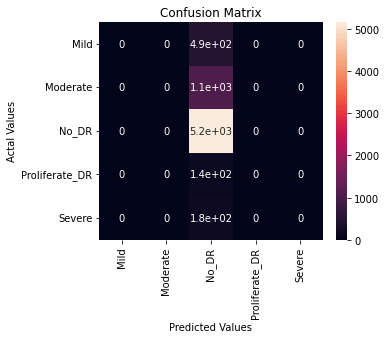

In [48]:
cm(y_true, y_preds_alexnet)

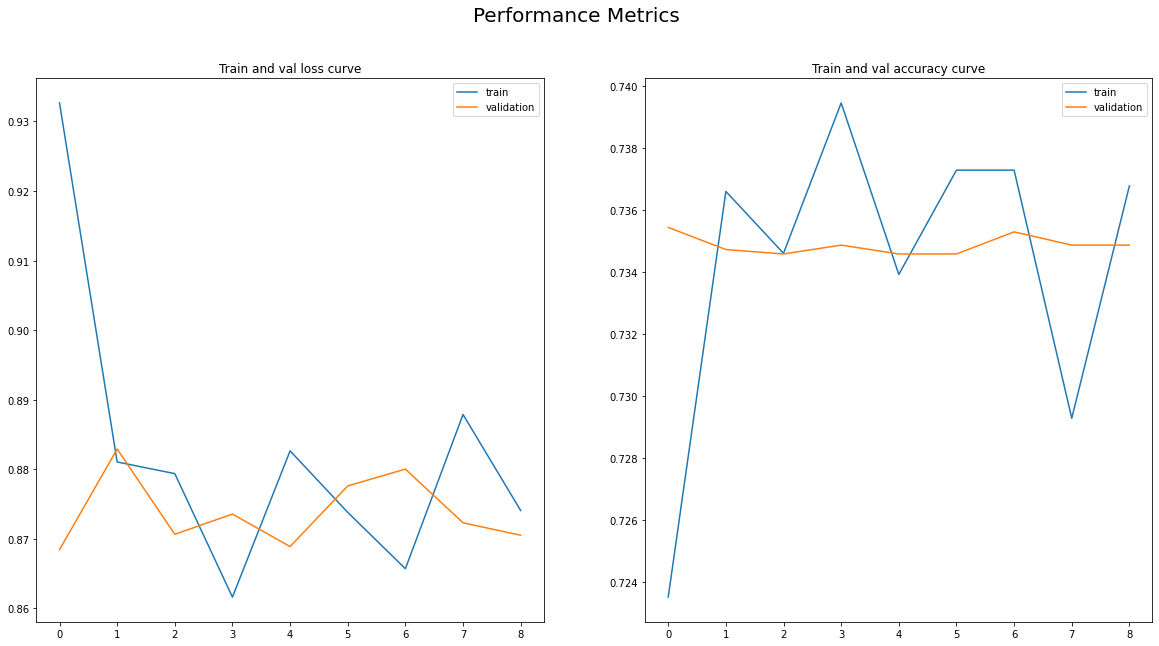

In [49]:
# Performance metrics for AlexNet
plot_result(model_alexnet_history)

## 2. DenseNet

In [50]:
# Basic architecture of DenseNet
model_densenet=DenseNet121(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_densenet.output
x= Flatten()(x)
x= Dense(1024, activation='relu')(x)
x= Dense(512, activation='relu')(x)
x= Dropout(0.5)(x)
output=Dense(len(classes),activation='softmax')(x) #FC-layer
model_denseNet=tf.keras.Model(inputs=model_densenet.input,outputs=output)

29097984/29084464 [==============================] - 0s 0us/step


In [51]:
# Summary of the denseNet model
model_denseNet.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [52]:
# Freezing the base model
for layer in model_denseNet.layers[:-5]:
    layer.trainable=False

In [53]:
model_denseNet_history = train_model(model_denseNet)

Epoch 1/10
175/175 [==============================] - 322s 2s/step - loss: 3.7121 - accuracy: 0.6655 - val_loss: 0.8751 - val_accuracy: 0.7347
Epoch 2/10
175/175 [==============================] - 315s 2s/step - loss: 0.9320 - accuracy: 0.7304 - val_loss: 0.8076 - val_accuracy: 0.7349
Epoch 3/10
175/175 [==============================] - 315s 2s/step - loss: 0.8981 - accuracy: 0.7314 - val_loss: 0.8065 - val_accuracy: 0.7353
Epoch 4/10
175/175 [==============================] - 313s 2s/step - loss: 0.9021 - accuracy: 0.7262 - val_loss: 0.7989 - val_accuracy: 0.7353
Epoch 5/10
175/175 [==============================] - 315s 2s/step - loss: 0.8697 - accuracy: 0.7348 - val_loss: 0.8306 - val_accuracy: 0.7366
Epoch 6/10
175/175 [==============================] - 313s 2s/step - loss: 0.8690 - accuracy: 0.7330 - val_loss: 0.8046 - val_accuracy: 0.7356
Epoch 7/10
175/175 [==============================] - 313s 2s/step - loss: 0.8614 - accuracy: 0.7387 - val_loss: 0.7984 - val_accuracy: 0.7352

In [54]:
model_denseNet.save('model_densenet_wiener_clahe_g.h5')

2022-10-30 11:49:45.997724: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.
2022-10-30 11:49:46.727462: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 205520896 exceeds 10% of free system memory.


In [55]:
# Evaluation metrics for denseNet model
model_denseNet_result = model_denseNet.evaluate(valid_data, batch_size=32)
model_denseNet_result

220/220 [==============================] - 143s 648ms/step - loss: 0.7878 - accuracy: 0.7382


[0.78782057762146, 0.7381833791732788]

In [56]:
y_preds_model_denseNet = make_predictions(model_denseNet)

220/220 [==============================] - 141s 635ms/step


In [57]:
# Metrics for denseNet
metrics(y_true, y_preds_model_denseNet)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(            class  sensitivity  specificity
 0            Mild     1.000000     0.000000
 1        Moderate     0.998324     0.003781
 2           No_DR     0.018250     0.979268
 3  Proliferate_DR     0.982418     0.028169
 4          Severe     0.999854     0.005714,
 0.7208143507972665)

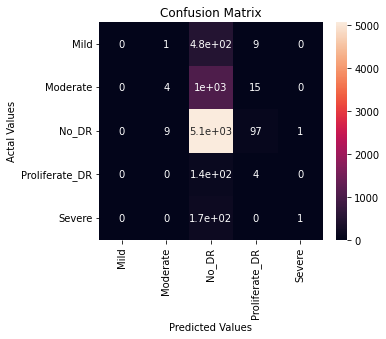

In [58]:
# Confusion Matrix
cm(y_true, y_preds_model_denseNet)

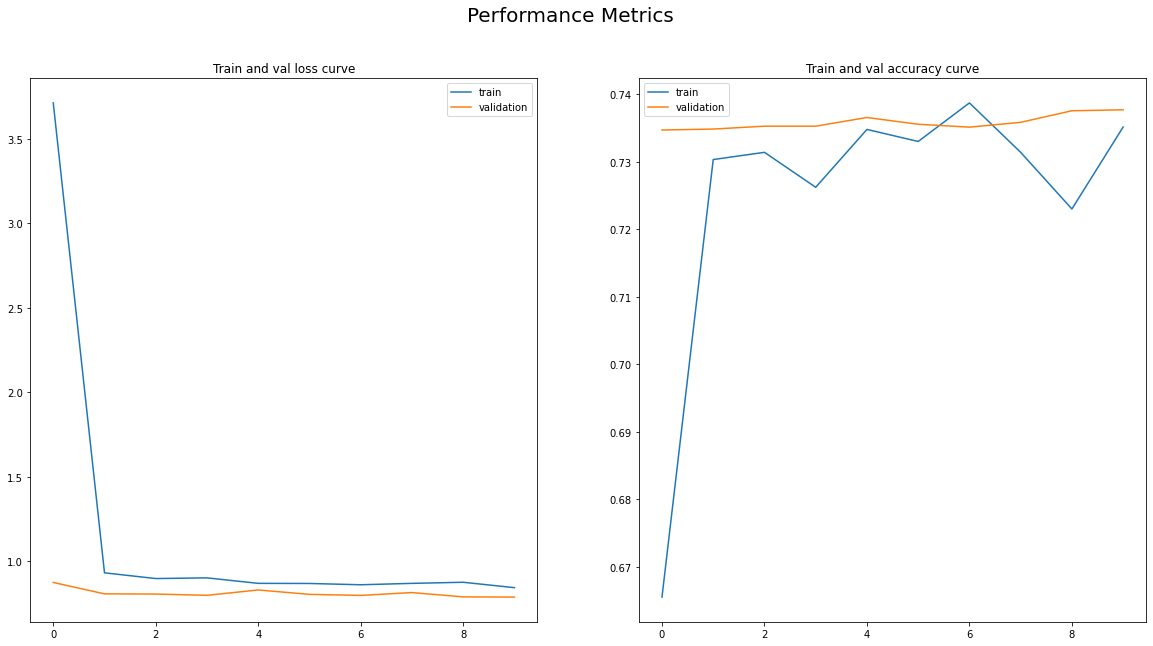

In [59]:
# Visualizing the evaluation metrics
plot_result(model_denseNet_history)

## 3. ResNet50

In [60]:
# Basic architecture model of ResNet50
model_resnet50=ResNet50(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_resnet50.output
x= GlobalMaxPooling2D()(x)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x= Dropout(0.5)(x)
output=Dense(len(classes),activation='softmax')(x) #FC-layer
model_resNet=tf.keras.Model(inputs=model_resnet50.input,outputs=output)

94781440/94765736 [==============================] - 0s 0us/step


In [61]:
# Summary of the ResNet50 model
model_resNet.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [62]:
# Freezing the base model
for layer in model_resNet.layers[:-5]:
    layer.trainable=False

In [63]:
model_resNet_history = train_model(model_resNet)

Epoch 1/10
175/175 [==============================] - 322s 2s/step - loss: 1.1337 - accuracy: 0.6616 - val_loss: 0.8911 - val_accuracy: 0.7340
Epoch 2/10
175/175 [==============================] - 316s 2s/step - loss: 0.9277 - accuracy: 0.7273 - val_loss: 0.8746 - val_accuracy: 0.7347
Epoch 3/10
175/175 [==============================] - 316s 2s/step - loss: 0.9017 - accuracy: 0.7359 - val_loss: 0.8673 - val_accuracy: 0.7349
Epoch 4/10
175/175 [==============================] - 318s 2s/step - loss: 0.8985 - accuracy: 0.7380 - val_loss: 0.8838 - val_accuracy: 0.7346
Epoch 5/10
175/175 [==============================] - 316s 2s/step - loss: 0.8792 - accuracy: 0.7386 - val_loss: 0.9180 - val_accuracy: 0.7343
Epoch 6/10
175/175 [==============================] - 316s 2s/step - loss: 0.9043 - accuracy: 0.7270 - val_loss: 0.9116 - val_accuracy: 0.7352
Epoch 7/10
175/175 [==============================] - 314s 2s/step - loss: 0.8956 - accuracy: 0.7307 - val_loss: 0.8723 - val_accuracy: 0.7285

In [64]:
model_resNet.save('model_resnet_wiener_clahe_g.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [65]:
y_preds_resNet = make_predictions(model_resNet)

220/220 [==============================] - 139s 628ms/step


In [81]:
# Evaluation metrics for resNet model
model_resNet_result = model_resNet.evaluate(valid_data, batch_size=32)
model_resNet_result

220/220 [==============================] - 147s 666ms/step - loss: 0.8890 - accuracy: 0.7348


[0.8889845609664917, 0.7347665429115295]

In [66]:
# Evaluation metrics for resNet
metrics(y_true, y_preds_resNet)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

(            class  sensitivity  specificity
 0            Mild          1.0          0.0
 1        Moderate          1.0          0.0
 2           No_DR          0.0          1.0
 3  Proliferate_DR          1.0          0.0
 4          Severe          1.0          0.0,
 0.7347665148063781)

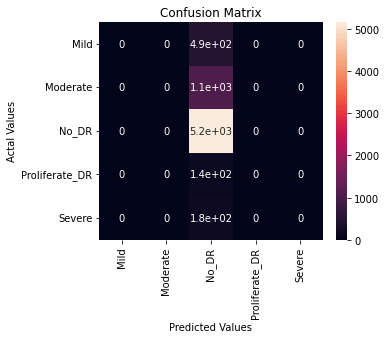

In [67]:
# Confusion matrix
cm(y_true, y_preds_resNet)

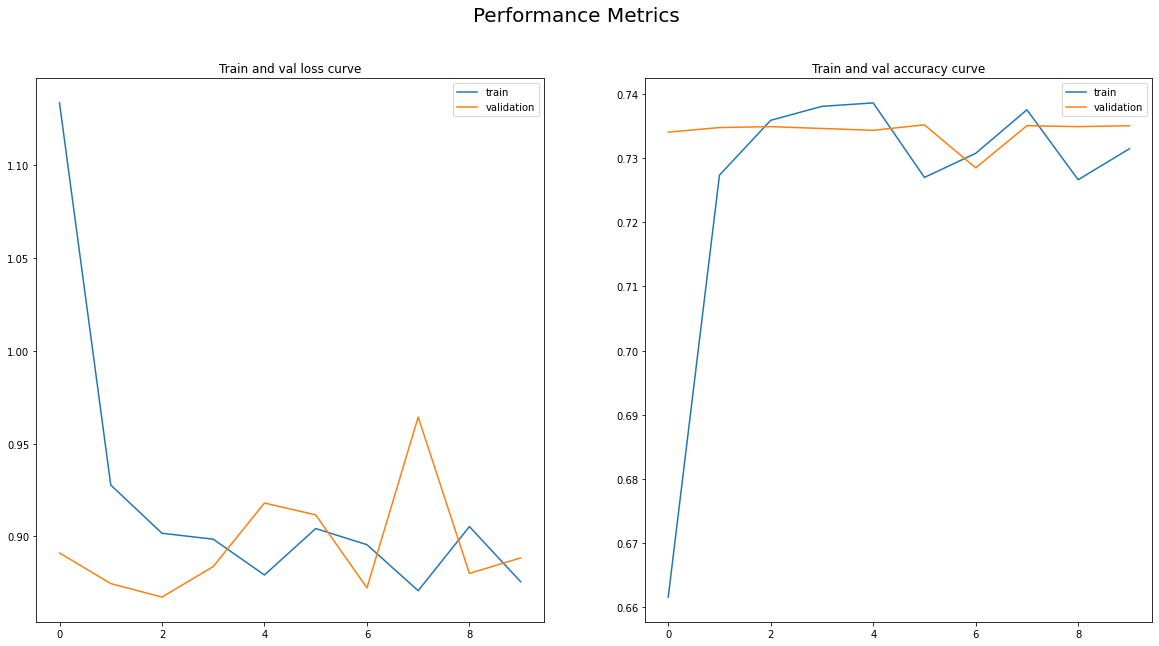

In [68]:
# Visualizing the evaluation metrics
plot_result(model_resNet_history)

## 4. InceptionV3

In [69]:
# Basic architecture model of InceptionV3
model_inception=InceptionV3(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_inception.output
x= GlobalAveragePooling2D()(x)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x= Dropout(0.5)(x)
output=Dense(len(classes),activation='softmax')(x) #FC-layer
model_inceptionV3=tf.keras.Model(inputs=model_inception.input,outputs=output)

87924736/87910968 [==============================] - 8s 0us/step


In [70]:
# Summary of InceptionV3
model_inceptionV3.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [71]:
# Freezing the base model
for layer in model_inceptionV3.layers[:-5]:
    layer.trainable=False

In [72]:
model_inception_history = train_model(model_inceptionV3)

Epoch 1/10
175/175 [==============================] - 320s 2s/step - loss: 1.5584 - accuracy: 0.6180 - val_loss: 0.9402 - val_accuracy: 0.7289
Epoch 2/10
175/175 [==============================] - 310s 2s/step - loss: 1.1283 - accuracy: 0.6698 - val_loss: 0.8779 - val_accuracy: 0.7363
Epoch 3/10
175/175 [==============================] - 313s 2s/step - loss: 0.9323 - accuracy: 0.7136 - val_loss: 0.8624 - val_accuracy: 0.7369
Epoch 4/10
175/175 [==============================] - 313s 2s/step - loss: 0.8966 - accuracy: 0.7252 - val_loss: 0.8479 - val_accuracy: 0.7367
Epoch 5/10
175/175 [==============================] - 313s 2s/step - loss: 0.8636 - accuracy: 0.7282 - val_loss: 0.8236 - val_accuracy: 0.7374
Epoch 6/10
175/175 [==============================] - 313s 2s/step - loss: 0.8682 - accuracy: 0.7282 - val_loss: 0.7985 - val_accuracy: 0.7376
Epoch 7/10
175/175 [==============================] - 312s 2s/step - loss: 0.8548 - accuracy: 0.7277 - val_loss: 0.8157 - val_accuracy: 0.7384

In [73]:
model_inceptionV3.save('model_inceptionv3_wiener_clahe_g.h5')

In [74]:
y_preds_inceptionV3 = make_predictions(model_inceptionV3)

220/220 [==============================] - 142s 639ms/step


In [82]:
# Evaluation metrics for inception model
model_inception_result = model_inceptionV3.evaluate(valid_data, batch_size=32)
model_inception_result

220/220 [==============================] - 141s 641ms/step - loss: 0.7971 - accuracy: 0.7392


[0.7970888018608093, 0.7391799688339233]

In [75]:
# Evaluation metrics for InceptionV3
metrics(y_true, y_preds_inceptionV3)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(            class  sensitivity  specificity
 0            Mild     1.000000     0.000000
 1        Moderate     0.996983     0.005671
 2           No_DR     0.017177     0.984693
 3  Proliferate_DR     0.988521     0.014085
 4          Severe     0.999270     0.005714,
 0.7248006833712984)

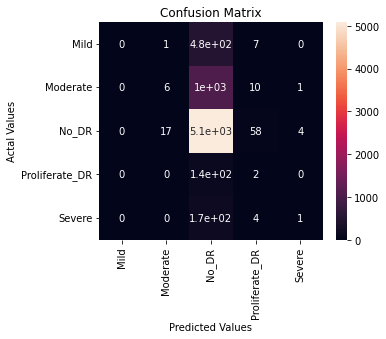

In [76]:
# confusion matrix for inceptionV3
cm(y_true, y_preds_inceptionV3)

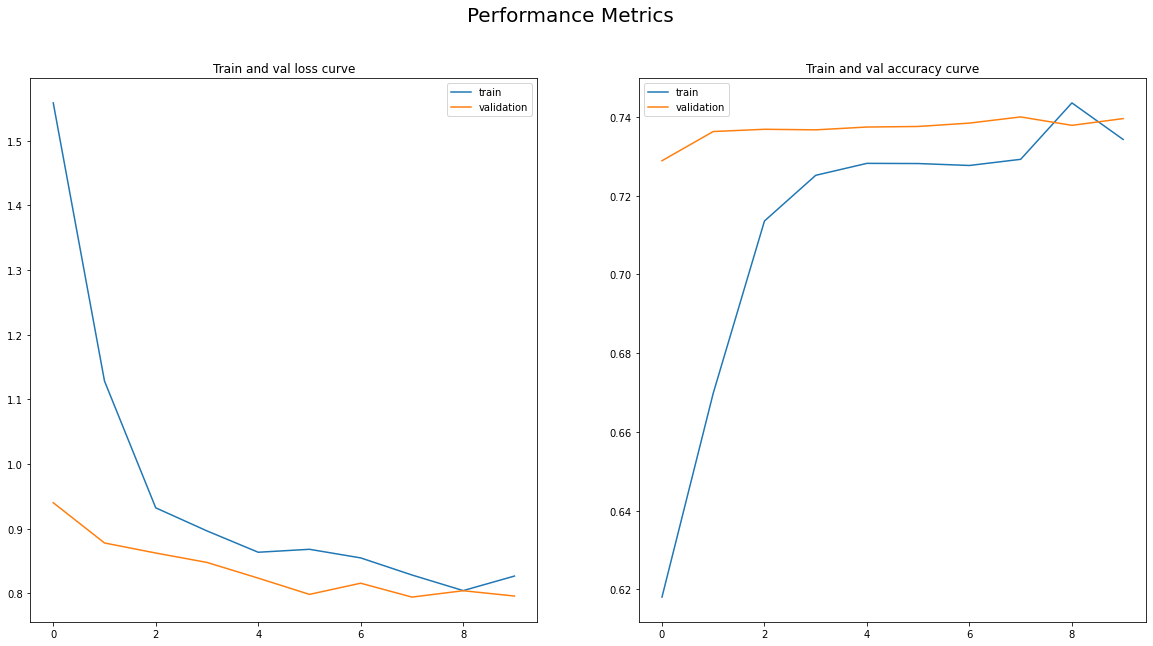

In [77]:
# Visualizing the evaluation metrics
plot_result(model_inception_history)

## 5. VGG-16

In [28]:
# Basic architecture model of VGG16
model_vgg=VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3)) 
x=model_vgg.output
x= GlobalAveragePooling2D()(x)
x= Dense(256, activation='relu')(x)
x= Dropout(0.5)(x)
output=Dense(len(classes),activation='softmax')(x) #FC-layer
model_vgg=tf.keras.Model(inputs=model_vgg.input,outputs=output)

2022-10-30 08:56:19.669826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 08:56:19.800346: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 08:56:19.801153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 08:56:19.804414: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [29]:
# Summary of VGG16 model
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [30]:
# Freezing the base model
for layer in model_vgg.layers[:-5]:
    layer.trainable=False

In [31]:
model_vgg_history = train_model(model_vgg)

2022-10-30 08:56:25.017698: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-30 08:56:27.776237: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


175/175 [==============================] - 342s 2s/step - loss: 0.9410 - accuracy: 0.7175 - val_loss: 0.8610 - val_accuracy: 0.7349
Epoch 2/10
175/175 [==============================] - 319s 2s/step - loss: 0.8759 - accuracy: 0.7368 - val_loss: 0.8507 - val_accuracy: 0.7344
Epoch 3/10
175/175 [==============================] - 316s 2s/step - loss: 0.8495 - accuracy: 0.7379 - val_loss: 0.8446 - val_accuracy: 0.7346
Epoch 4/10
175/175 [==============================] - 316s 2s/step - loss: 0.8606 - accuracy: 0.7368 - val_loss: 0.8318 - val_accuracy: 0.7350
Epoch 5/10
175/175 [==============================] - 319s 2s/step - loss: 0.8510 - accuracy: 0.7355 - val_loss: 0.8280 - val_accuracy: 0.7340
Epoch 6/10
175/175 [==============================] - 317s 2s/step - loss: 0.8343 - accuracy: 0.7398 - val_loss: 0.8363 - val_accuracy: 0.7349
Epoch 7/10
175/175 [==============================] - 318s 2s/step - loss: 0.8598 - accuracy: 0.7293 - val_loss: 0.8242 - val_accuracy: 0.7350
Epoch 8/10

In [32]:
# Evaluation metrics for InceptionV3 model
model_vgg_result = model_vgg.evaluate(valid_data, batch_size=32)
model_vgg_result

220/220 [==============================] - 143s 649ms/step - loss: 0.8248 - accuracy: 0.7348


[0.8247964382171631, 0.7347665429115295]

In [33]:
model_vgg.save('model_vgg16_wiener_clahe_g.h5')

In [34]:
y_preds_model_vgg = make_predictions(model_vgg)

220/220 [==============================] - 138s 626ms/step


In [37]:
# Evaluate metrics for VGG16
metrics(y_true, y_preds_model_vgg)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

(            class  sensitivity  specificity
 0            Mild          1.0          0.0
 1        Moderate          1.0          0.0
 2           No_DR          0.0          1.0
 3  Proliferate_DR          1.0          0.0
 4          Severe          1.0          0.0,
 0.7347665148063781)

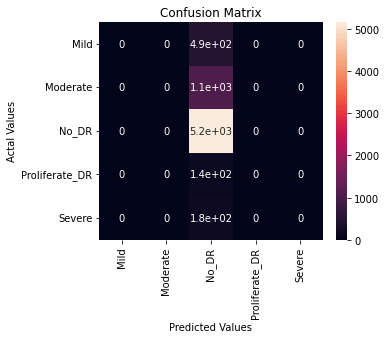

In [38]:
cm(y_true, y_preds_model_vgg)

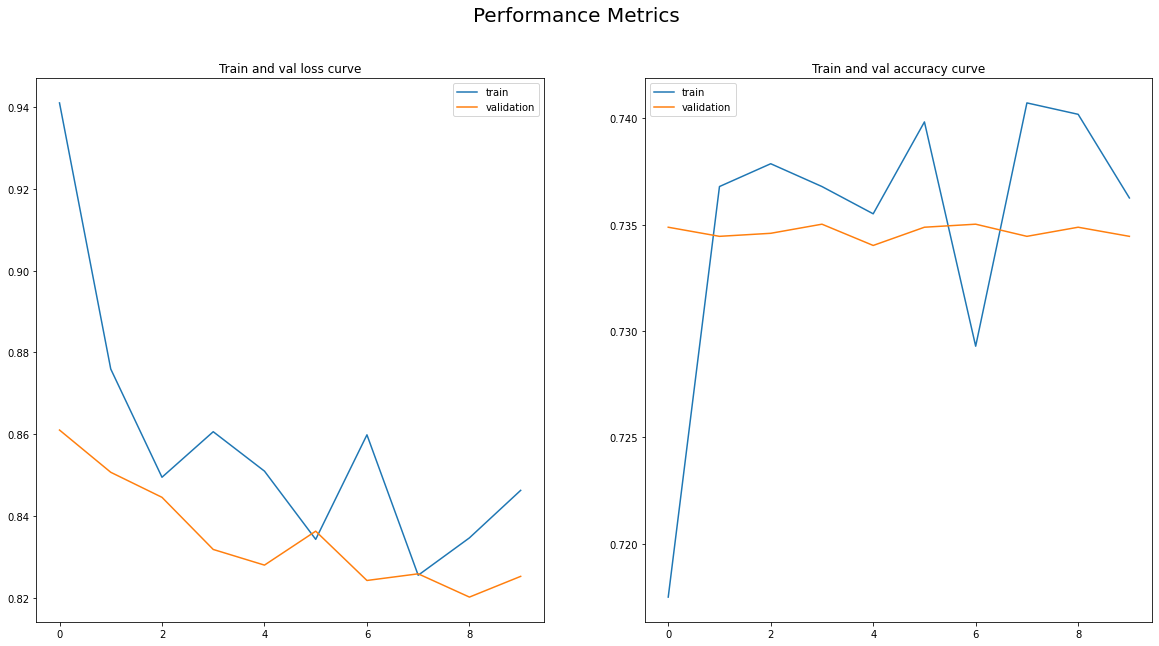

In [39]:
# Visualizing the evaluation metrics
plot_result(model_vgg_history)

## Plotting predictions on Test Dataset

In [79]:
model_names=["AlexNet", "DenseNet121", "ResNet50", "InceptionV3", "VGG16"]

In [84]:
model_alexnet_results

[0.8705084323883057, 0.7347665429115295]

In [88]:
x = metrics(y_true, y_preds_model_vgg)
x[0]['Mild']['sensitivity']

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

class  sensitivity  specificity
0            Mild          1.0          0.0
1        Moderate          1.0          0.0
2           No_DR          0.0          1.0
3  Proliferate_DR          1.0          0.0
4          Severe          1.0          0.0

In [113]:
predictions = [y_preds_alexnet, y_preds_model_denseNet, y_preds_resNet, y_preds_inceptionV3, y_preds_model_vgg]
acc = []
sns = pd.DataFrame(index=classes, columns=model_names)
spc = pd.DataFrame(index=classes, columns=model_names)
for i in range(len(predictions)):
    x = metrics(y_true, predictions[i])
    acc.append((model_names[i], x[1]))
    for j in range(5):
        sns[model_names[i]][classes[j]] = np.float32(x[0][x[0]['class']==classes[j]]['sensitivity'])[0]
        spc[model_names[i]][classes[j]] = np.float32(x[0][x[0]['class']==classes[j]]['specificity'])[0]
acc, sns, spc;

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

In [114]:
# Specificity
spc

AlexNet DenseNet121 ResNet50 InceptionV3 VGG16
Mild               0.0         0.0      0.0         0.0   0.0
Moderate           0.0    0.003781      0.0    0.005671   0.0
No_DR              1.0    0.979268      1.0    0.984693   1.0
Proliferate_DR     0.0    0.028169      0.0    0.014085   0.0
Severe             0.0    0.005714      0.0    0.005714   0.0

In [115]:
# Sensitivity
sns

AlexNet DenseNet121 ResNet50 InceptionV3 VGG16
Mild               1.0         1.0      1.0         1.0   1.0
Moderate           1.0    0.998324      1.0    0.996983   1.0
No_DR              0.0     0.01825      0.0    0.017177   0.0
Proliferate_DR     1.0    0.982418      1.0    0.988521   1.0
Severe             1.0    0.999854      1.0     0.99927   1.0

In [118]:
accuracy = pd.DataFrame(acc, columns=["model", "accuracy"])
accuracy

model  accuracy
0      AlexNet  0.734767
1  DenseNet121  0.720814
2     ResNet50  0.734767
3  InceptionV3  0.724801
4        VGG16  0.734767

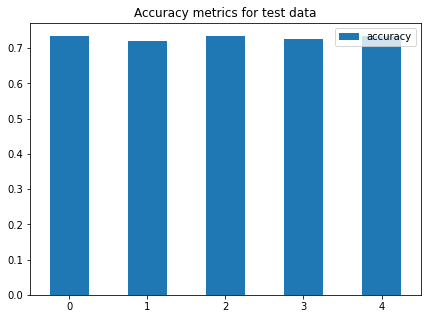

In [119]:
# Plotting the accuracy
accuracy.plot(kind='bar', figsize=(7, 5), rot=0, title="Accuracy metrics for test data");

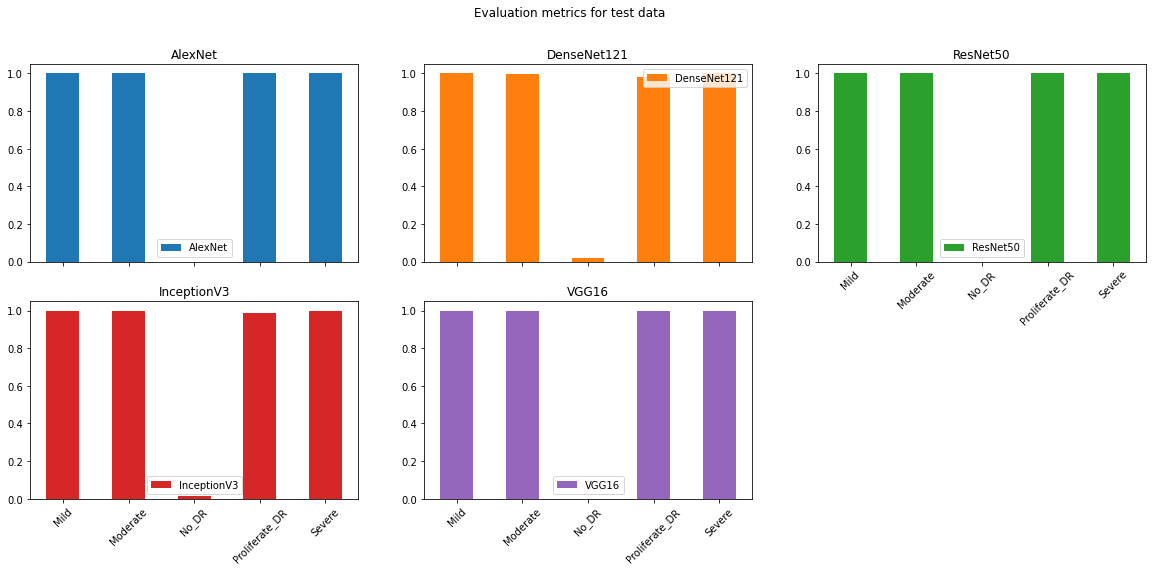

In [120]:
# Plotting the sensitivity
sns.plot(kind='bar', subplots=True, layout=(2, 3), figsize=(20, 8), rot=45, title="Evaluation metrics for test data");

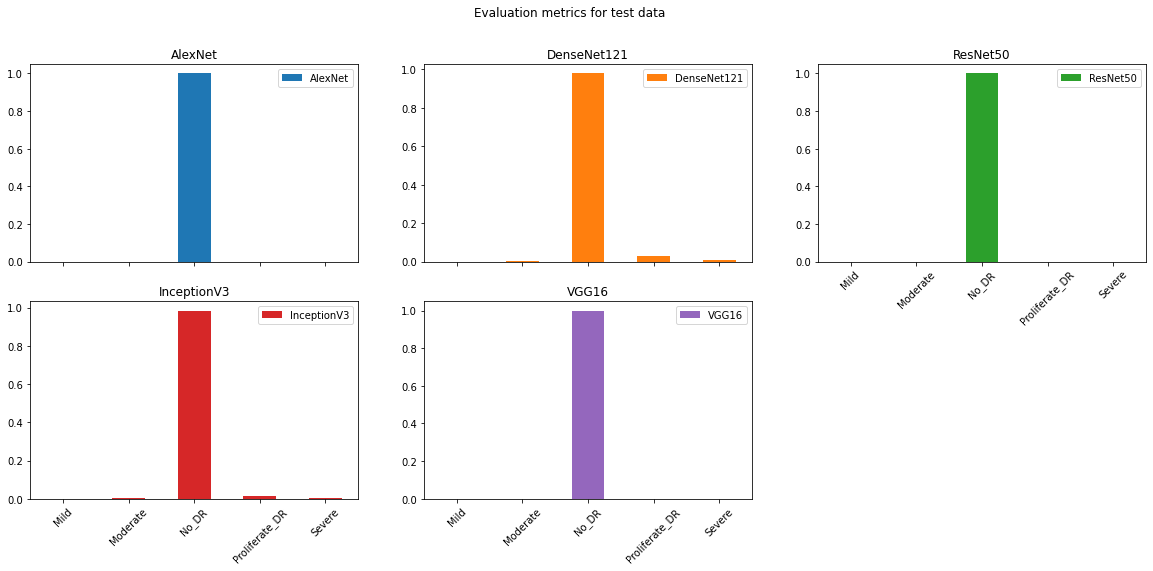

In [121]:
# Plotting the specificity
spc.plot(kind='bar', subplots=True, layout=(2, 3), figsize=(20, 8), rot=45, title="Evaluation metrics for test data");